In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sowfadict as sowfa
import inflowPrepMMC as inflowprep
from matplotlib.colors import Normalize

# Show terrain cases with towers
This is taken from ~/Code/Python/CreateProbeLines.swfa.py
### Define user variables

In [2]:
# - - - - - - - - USER INPUT - - - - - - - -  
fdir     = '/projects/mmc/NWTCRegion/meshes/'
casename = ['SR_20m','DiffF2_20m']
ncases   = np.shape(casename)[0]
#boundaryDir = SET YOUR DIRECTORY TO THE LOWER BOUNDARY POINTS HERE!


dx = 20.0 # grid spacing over lowest model mesh
hdx = dx/2.0
# Start of the lines (bottom or left)
linestartx = [-12000,-10000,-8000,-6000,-4000,-2000,0,2000]
linestartx = [x+hdx for x in linestartx]
# Center of the lines -- will build outward from this point
linestartc = [hdx,hdx,hdx,hdx,hdx,hdx,hdx,hdx]
lineaxis   = ['v','v','v','v','v','v','v','v']
twc = ['darkred','red','orange','gold','darkgreen','darkblue','indigo','darkviolet']
ppl = 9 #probes per line
probespace = 280.0 # spacing between probes along the line 

nlines = np.shape(linestartx)[0]
if nlines != np.shape(linestartc)[0] or nlines != np.shape(lineaxis)[0]: 
    print "Line starts do not match dimensions..."; exit()

# Heights of the probe AGL
probeZ = np.arange(10.001,1500.0011,20.0)

lblsize = 14.0
txtsize = 12.0
legsize = 10.0
#- - - - - - - - - - - - - - - - - - - - - -  
savedir = '/home/phawbeck/SOWFA/Terrain/img/'
saveFig = False

### Get the boundary data

In [3]:
for cc in range(0,ncases):
    boundaryDir = '%sNWTC.meshGeneration.%s/' % (fdir,casename[cc])
    print boundaryDir
    boundary = inflowprep.inflowPrepMMC()
    boundary.readBoundaryDataPoints(boundaryDir + 'postProcessing/boundaryData/lower/points')

    dimf = open(boundaryDir + 'setUp','r')
    for line in dimf:
        line = line.split()
        if np.shape(line)[0] != 0:
            if line[0] == 'nx1':
                nx = int(line[1].replace(';',''))
            if line[0] == 'ny1':
                ny = int(line[1].replace(';',''))
    dimf.close()
    xy = boundary.xyz[:,0]; yx = boundary.xyz[:,1]; zf = boundary.xyz[:,2]
    xy = np.reshape(xy,(nx,ny))
    yx = np.reshape(yx,(nx,ny))
    zf = np.reshape(zf,(nx,ny))
    if cc == 0:
        xx = np.zeros((ncases,np.shape(xy)[0],np.shape(xy)[1]))
        yy = np.zeros((ncases,np.shape(xy)[0],np.shape(xy)[1]))
        zz = np.zeros((ncases,np.shape(xy)[0],np.shape(xy)[1]))
    xx[cc,:,:] = xy
    yy[cc,:,:] = yx
    zz[cc,:,:] = zf
        

/projects/mmc/NWTCRegion/meshes/NWTC.meshGeneration.SR_20m/
/projects/mmc/NWTCRegion/meshes/NWTC.meshGeneration.DiffF2_20m/


### Plot the terrain and towers

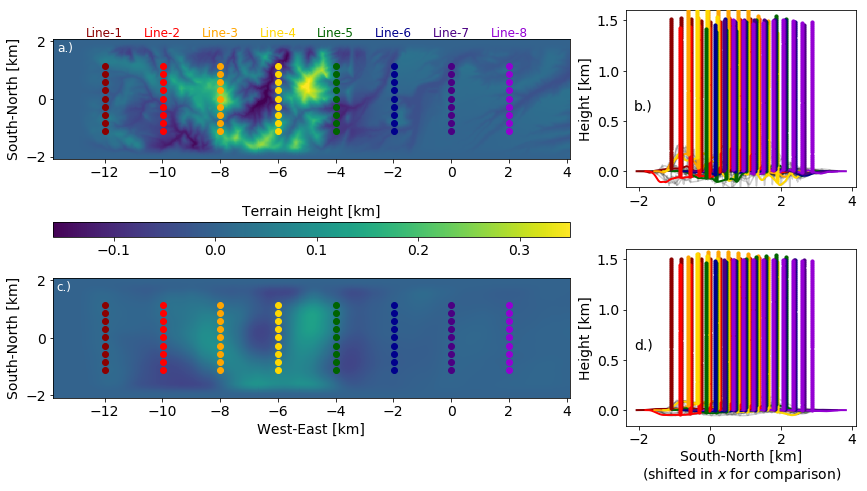

In [4]:
fig = plt.figure(figsize=(12,7))
fig.subplots_adjust(hspace=0.35,top=0.95,left=0.06,right=0.99,wspace=0.65)
for cc in range(0,ncases):
    horz = plt.subplot2grid((ncases,6),(cc,0),aspect='equal',colspan=4)
    horz.tick_params(labelsize=lblsize)
    cont = horz.pcolormesh(xx[cc,:,:]/1000.0,yy[cc,:,:]/1000.0,zz[cc,:,:]/1000.0,
                           norm=Normalize(-.160,.350),rasterized=True)
    vert = plt.subplot2grid((ncases,6),(cc,4),colspan=2)#,aspect='equal')
    vert.tick_params(labelsize=lblsize)
    slope = 0.25

    for ii in range(0,nlines):
        if lineaxis[ii] == 'v':
            pxz = np.zeros((ppl,np.shape(probeZ)[0]))
            pyz = np.zeros((ppl,np.shape(probeZ)[0]))
            pzy = np.zeros((ppl,np.shape(probeZ)[0]))
            loix = linestartx[ii]
            for pp in range(0,ppl):
                loiy = linestartc[ii] + (pp - (ppl-1)/2)*probespace
                dist = ((xx[cc,:,:]-loix)**2 + (yy[cc,:,:]-loiy)**2)**0.5
                px,py = np.where(dist==np.min(dist))
                # - - - - - - - - - - - - - - - - - - - - - - - - - -
                # How should the values be determined?
                # z-values will be from the real mesh...
                pyz[pp,:] = yy[cc,px,py][0] # from the closest grid values?
                pxz[pp,:] = xx[cc,px,py][0] # from the closest grid values?
    #            pyz[pp,:] = loiy      # or from the generated values?
                # - - - - - - - - - - - - - - - - - - - - - - - - - -
                pzy[pp,:] = zz[cc,px,py][0]+probeZ

        vert.plot(yy[cc,px[0],:]/1000.0+(ii*slope),zz[cc,px[0],:]/1000.0,lw=2,zorder=2,c=twc[ii])
        vert.scatter(pyz/1000.0+(ii*slope),pzy/1000.0,s=10,zorder=3,c=twc[ii])
    for ii in range(0,nlines):
        loix = linestartx[ii]
        horz.scatter(np.ones((ppl))*loix/1000.0,pyz[:,0]/1000.0,c=twc[ii])
        if cc == 0: horz.text(loix/1000.0,2.05,'Line-%d' % (ii+1),size=txtsize,color=twc[ii],va='bottom',ha='center')
    horz.set_ylabel('South-North [km]',size=lblsize)
    if cc == ncases-1: horz.set_xlabel('West-East [km]',size=lblsize)
    if cc == 0: horz.text(-13.65,1.99,'a.)',color='w',ha='left',va='top',fontsize=txtsize)
    if cc == 1: horz.text(-13.65,1.99,'c.)',color='w',ha='left',va='top',fontsize=txtsize)


    for jj in range(0,ny,11):
        sBordS = yy[cc,0,jj]/1000.0 ; sBordE = yy[cc,-1,jj]/1000.0 + (nlines-1)*slope
        sBord = np.linspace(sBordS,sBordE,nx)
        vert.plot(sBord,zz[cc,:,jj]/1000.0,c='k',alpha=0.2,zorder=1)
    gridX = np.arange(0,nx,30)
    for ii in gridX:
        vert.plot(yy[cc,ii,:]/1000.0+((float(ii)/(gridX[-1]-1))*(nlines-1)*slope),zz[cc,ii,:]/1000.0,\
                  c='k',alpha=0.2,zorder=1)
    vert.plot(yy[cc,-1,:]/1000.0+((nlines-1)*slope),zz[cc,-1,:]/1000.0,c='k',alpha=0.2,zorder=1)
    #vert.plot(SoBord,zz[:,0]/1000.0,c='k')
    created = False

    vert.set_ylabel('Height [km]',size=lblsize)
    vert.set_ylim(-0.16,1.6)
    if cc == 0: vert.text(-2.15,0.72,'b.)',color='k',ha='left',va='top',fontsize=lblsize)
    if cc == 1: vert.text(-2.15,0.72,'d.)',color='k',ha='left',va='top',fontsize=lblsize)
vert.set_xlabel('South-North [km]\n(shifted in $x$ for comparison)',size=lblsize)

cax = fig.add_axes([0.06, 0.5, 0.599, 0.03])
cax.text(0.5,1.2,'Terrain Height [km]',ha='center',va='bottom',size=lblsize)
cbar = plt.colorbar(cont,cax,orientation='horizontal')
cbar.ax.tick_params(labelsize=lblsize)
if saveFig: plt.savefig('{}TerrainAndTowers.pdf'.format(savedir))
plt.show()